# A Subtle Issue with Expected Limits Made with Aysmptotics for More Than One Parameter

by Kyle Cranmer & Johann Brehmer, March 2018

This short notebook addresses two subtle issues in setting expected limits using asymptotics in models with more than one parameter of interest. The first is an easy-to-make mistake when creating the "expected" contour. In addition, we point out that the standard prescription for defining the "expected" contour does not lead to a "representative" contour. 

Let $\theta$ be the parameter vector, $k$ be the dimensionality of the parameter vector, $x$ be the data, $p(x|\theta)$ be the statistical model, and $\hat{\theta}=\hat{\theta}(x)$ be the maximum likelihood estimator (MLE). 

In the asymptotic approximation 
\begin{equation}
q_\theta = -2\log\lambda(\theta) \approx (\hat{\theta} - \theta)^T V^{-1} (\hat{\theta} - \theta)
\end{equation}
where $V$ is the covariance matrix for the MLE, which can be related to the Fisher information matrix $V^{-1}_{ij} = - E\left [\frac{\partial^2}{\partial \theta_i \partial \theta_j} \log L(\theta)\right ]$.

One then considers the distribution of $q_\theta$ assuming the true value is $\theta_0$. The null hypothesis is $\theta_0=\theta$ and the distribution $p(q_\theta|\theta)$ is a chisquare distribution with $k$ degrees of freedom, where $k$ is the dimensionality of $\theta$. The observed contours are drawn by thresholding at $q_{thresh}$ such that $P(\chi^2_k < q_{thresh})=CL$.

The "expected" contour usually defined by assuming the true value is $\theta_0$ and finding the $\theta$ values such that $P(q_\theta > q_{thresh}| \theta_0)=50\%$. The distribution for $p(q_\theta | \theta_0)$ is given by a non-central chisquare distribution with $k$ degrees of freedom and non-centrality parameter $\Lambda$. In the asymptotic limit
\begin{equation}
\Lambda = (\theta_0 - \theta)^T V^{-1} (\theta_0 - \theta)
\end{equation}
Alternatively $\Lambda = -2 \log \lambda_{\rm Asimov}(\theta) = q_A$ where the Asimov data is generated at $\theta_0$.

The issue is that while observed limits come from a simple contour of $-2 \log \lambda_{\rm obs.}(\theta)$, the median "expected" limit does not come from thresholding on $-2 \log \lambda_{\rm Asimov}(\theta)=q_A(\theta)$ at the same contour levels. The reason is that in more than one dimension the 
\begin{equation}
\text{median} \left[ -2 \log \lambda \right] \ne -2 \log \lambda_{Asimov}
\end{equation}
Instead 
\begin{equation}
\text{median} \left[ -2 \log \lambda \right] = F^{-1}( 1/2, k, \Lambda = -2 \log \lambda_{Asimov}),
\end{equation}
where $F$ is the cumulative distribution function of the noncentral chisquare (with $k$ degrees of freedom and noncentrality parameter $\Lambda$). Intuitively, $-2 \log \lambda_{Asimov}(\theta)$ only probes the variation of the MLE in the direction parallel to $(\theta-\theta_0)$, but fluctuations in the perpindicular directions need to be accounted for (which is irrelevant in one dimensional problems). 

The general equations relating the median to the Asimov value are discussed in the original paper and in these [slides from Ofer ](https://indico.cern.ch/event/74940/contributions/2088584/attachments/1047729/1493442/Wald-Asimov.pdf ), but the equations were only fleshed out in 1-D. The plot on page 5 of the slides, for instance, is for $k=1$. It is likely that this subtle issue is often neglected.

Below we will plot what happens for $k=2$ and a simple model 
\begin{equation}
p(x,y | \theta) = N(x|\mu_x,1) N(y|\mu_y,1)
\end{equation}
and $\theta=(\mu_x, \mu_y)$. In this setting the asymptotic approximation is exact and $\hat{\theta} = (x,y)$.

### Conclusions from studies below:
   * The observed contours are not affected.
   * The "expected" 95% contours based on thresholding directly on $-2 \log \lambda_{Asimov}(\theta)$ are about 10% too wide
     * They can be interpreted as median expected limits for a 97% confidence level assuming $\theta_0$ is true.
     * They can be interpreted as a median+8% band for the 95% confidence interval assuming $\theta_0$ is true.
   * The "expected" 68% contours based on thresholding directly on $-2 \log \lambda_{Asimov}(\theta)$ are about 33% too wide
     * They can be interpreted as median expected limits for a 81% confidence level assuming $\theta_0$ is true.
     * They can be interpreted as a median+14% band for the 68% confidence interval assuming $\theta_0$ is true.   
     
### The case in favor of contours based on $-2 \log \lambda_{Asimov}(\theta)$

An additional subtlety is that the informal notion of the "expected" contour is not unique. As the data fluctuates, the contours fluctuate, and the concept of a distribution over contours is not convenient to work with. Below we will make a distinction between the "expected" contour and a "representative" contour. In the simple 2-d multivariate Gaussian example, the contours are centered at $\hat{\theta}=(x,y)$, and they always have the same size (in terms of the radius of the contours). The contour based on $q_A$ will have the same radius as all the observed contours, and the center of the contour will be at the expected maximum likelihood estimator at $\theta_0$. In contrast, using the definition of an "expected" contour defined above (ie. when the alternative p-value or power or type-II error is 50%), the contours are systematically smaller. The radius of the "expected" 68% contour is about 75% the radius of an observed 68% contour. The "expected" contour at 40% confidence level is almost 7 times smaller than the observed contours would be, and the "expected" contour for 39% confidence level doesn't even exist. Thus, perhaps it is more meaningful to use contours based on $q_A = -2 \log \lambda_{Asimov}(\theta)$ (as with the observed data) when the maximum likelihood estimator takes on it's expected value (eg. $\hat{\theta}=\theta_0$). These contours will be more representative of the observed contours (eg. they will have the same radius), but the meaning of these contours does not correspond to the median of $p(-2 \log \lambda(\theta) | \theta_0)$.

In [1]:
import numpy as np
from scipy.stats import chi2, ncx2 #central and noncentral chi-square
import matplotlib.pyplot as plt
#plt.figure(dpi=300,figsize=(5,5))

### Plot median vs. $q_A$

Note, the median is approximately equal to $q_A+k-1=q_A+1$.

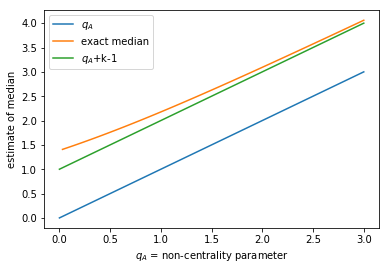

In [2]:
temp_q = np.linspace(0,3,100)
plt.plot(temp_q, temp_q, label='$q_A$')
plt.plot(temp_q, ncx2.median(df=2, nc=temp_q), label='exact median')
plt.plot(temp_q, temp_q+2-1, label='$q_A$+k-1')
plt.xlabel('$q_A$ = non-centrality parameter')
plt.ylabel('estimate of median')
plt.legend()

## What goes wrong if you use $q_A$ for expected limit

Probably many people are setting expected limits by using the $\chi^2_2$ tables for the Asimov data. Eg. looking for when $P( \chi^2_2 > q_A) = 5\%$.  

Let's consider the "standard model" point to be $\theta_0 = (\mu_x',\mu_y')=(0,0)$.

If we are testing the point $\theta = (\mu_x,\mu_y)=(2.447,0)$, then we have $P( \chi^2_2 > q_A) = 5\%$. Now run many "standard model" toys and look at the distribution of $p(q=-2\log \lambda(\theta) |\theta_0)$

In [3]:
N=100000 # Number of Monte Carlo toys
k=2 # dimensionality of parameter vector
CL=0.95 # target Confidence Level (eg. can switch to 68%)

In [4]:
mux_prime = 0.
muy_prime = 0.
mux = np.sqrt(chi2.ppf(CL,k)) # 2.447 = sqrt(5.99) is 95% threshold on chi^2 for k=2
muy = 0.
x=np.random.normal(mux_prime,1,N)
y=np.random.normal(muy_prime,1,N)

q_prime=(x-mux_prime)**2+(y-muy_prime)**2
q=(x-mux)**2+(y-muy)**2
q_A=(mux_prime-mux)**2+(muy_prime-muy)**2

note `q_A` is not equal to the mean or median, but `q_A+1` is very close to the median.

In [5]:
q_A, np.mean(q), np.median(q), q_A+2-1

(5.9914645471079799, 7.979600520960644, 6.9929601929355005, 6.9914645471079799)

Check the mean and median of a noncentral chisquare$_2$ with non centrality parameter `nc=q_A`. They are in good agreement with the toys

In [6]:
q_A, ncx2.mean(df=k, nc=q_A), ncx2.median(df=k, nc=q_A)

(5.9914645471079799, 7.9914645471079799, 7.0199654759560293)

**The Point** The p-value associated to $q_A$ is 5%, but it is not the p-value associated to the median of the standard model toys. The p-value for the median standard model toy is 3%

In [7]:
# p-values for alternative hypothesis using toys 
alt_p_q_A_toys = np.sum(q>q_A)/N
alt_p_median_toys = np.sum(q>q_A+k-1)/N
alt_p_q_A_toys, alt_p_median_toys

(0.58181000000000005, 0.50016000000000005)

In [8]:
# p-values for alternative hypothesis using exact results 
alt_p_q_A = 1.-ncx2.cdf(q_A, df=2,nc=q_A)
alt_p_median = 1.-ncx2.cdf(q_A+k-1,df=2,nc=q_A)
alt_p_q_A, alt_p_median

(0.58339136922476775, 0.50223642999231388)

In [9]:
# p-values for null hypothesis using toys
null_p_q_A_toys = np.sum(q_prime>q_A)/N
null_p_median_toys = np.sum(q_prime>q_A+1)/N
null_p_q_A_toys, null_p_median_toys

(0.049209999999999997, 0.030009999999999998)

In [10]:
# p-values for null hypothesis using exact results
null_p_q_A = 1.-chi2.cdf(q_A,k)
null_p_median = 1.-chi2.cdf(q_A+k-1,k)
null_p_q_A, null_p_median

(0.050000000000000044, 0.030326532985631705)

Now let's plot the distribution of q under the two hypotheses.

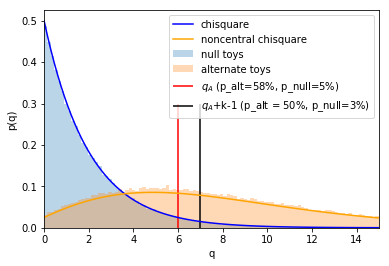

In [11]:
bins = np.linspace(0,15,100)
_ = plt.hist(q_prime,bins=bins, alpha=.3, normed=True, label='null toys')
_ = plt.hist(q,bins=bins, alpha=.3,normed=True, label='alternate toys')
plt.plot(bins,chi2.pdf(bins,df=k), c='blue', label='chisquare')
plt.plot(bins,ncx2.pdf(bins,df=k, nc=q_A), c='orange', label='noncentral chisquare')

plt.vlines(q_A,0,.3, color='r', 
           label='$q_A$ (p_alt={:.0%}, p_null={:.0%})'
           .format(alt_p_q_A, null_p_q_A))
plt.vlines(q_A+k-1,0,.3, 
           label='$q_A$+k-1 (p_alt = {:.0%}, p_null={:.0%})'
           .format(alt_p_median, null_p_median))
plt.xlabel('q')
plt.ylabel('p(q)')
plt.xlim(0,15)
plt.legend()

## Do the same thing with better prescription
What does it look like if instead we draw contours by thresholding on $P(\chi^2_2 > q_{median}) = P(\chi^2_2 > q_A+1)=5\%$ ? To test this, we want $q_A$ to be smaller by one unit, so $\mu_x$ should be correspondingly smaller.

In [12]:
mux_prime = 0.
muy_prime = 0.
mux = np.sqrt(chi2.ppf(CL,2)-k+1) # 2.23=sqrt(5.99-1) for k=2
muy = 0.
x=np.random.normal(mux_prime,1,N)
y=np.random.normal(muy_prime,1,N)

q_prime=(x-mux_prime)**2+(y-muy_prime)**2
q=(x-mux)**2+(y-muy)**2
q_A=(mux_prime-mux)**2+(muy_prime-muy)**2

In [13]:
# p-values for alternative hypothesis using toys 
alt_p_q_A_toys = np.sum(q>q_A)/N
alt_p_median_toys = np.sum(q>q_A+k-1)/N
alt_p_q_A_toys, alt_p_median_toys

(0.59321000000000002, 0.50499000000000005)

In [14]:
# p-values for alternative hypothesis using exact results 
alt_p_q_A = 1.-ncx2.cdf(q_A, df=2,nc=q_A)
alt_p_median_toys = 1.-ncx2.cdf(q_A+k-1,df=2,nc=q_A)
alt_p_q_A, alt_p_median

(0.59185428231823689, 0.50223642999231388)

In [15]:
# p-values for null hypothesis using toys
null_p_q_A_toys = np.sum(q_prime>q_A)/N
null_p_median_toys = np.sum(q_prime>q_A+1)/N
null_p_q_A_toys, null_p_median_toys

(0.081589999999999996, 0.049509999999999998)

In [16]:
# p-values for null hypothesis using exact results
null_p_q_A = 1.-chi2.cdf(q_A,k)
null_p_median = 1.-chi2.cdf(q_A+k-1,k)
null_p_q_A, null_p_median

(0.082436063535006543, 0.050000000000000044)

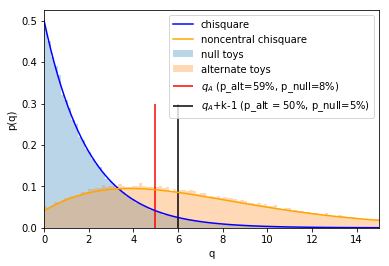

In [17]:
bins = np.linspace(0,15,100)
_ = plt.hist(q_prime,bins=bins, alpha=.3, normed=True, label='null toys')
_ = plt.hist(q,bins=bins, alpha=.3,normed=True, label='alternate toys')
plt.plot(bins,chi2.pdf(bins,df=k), c='blue', label='chisquare')
plt.plot(bins,ncx2.pdf(bins,df=k, nc=q_A), c='orange', label='noncentral chisquare')

plt.vlines(q_A,0,.3, color='r', 
           label='$q_A$ (p_alt={:.0%}, p_null={:.0%})'.format(alt_p_q_A, null_p_q_A))
plt.vlines(q_A+k-1,0,.3, 
           label='$q_A$+k-1 (p_alt = {:.0%}, p_null={:.0%})'.format(alt_p_median, null_p_median))
plt.xlabel('q')
plt.ylabel('p(q)')
plt.xlim(0,15)
plt.legend()

## What does it look like visually?

**The Point** the "expected" 95% contours based on the median $q_A+k-1$ are about 91% the width of the representative contour based on $q_A$. The 68% contours based on the  median $q_A+k-1$ are about 75% of the width of the representative contour based on $q_A$. As the confidence level approaches 39%, the radius of the median contours goes to zero, while the representative contours are the same size as for the observed.

In [45]:
CL=0.95
mux_q_A = np.sqrt(chi2.ppf(CL,k))
mux_median = np.sqrt(chi2.ppf(CL,k)-k+1)
mux_median/mux_q_A

0.91274087212764432

In [46]:
CL=0.68
mux_q_A_68 = np.sqrt(chi2.ppf(CL,k))
mux_median_68 = np.sqrt(chi2.ppf(CL,k)-k+1)
mux_median_68/mux_q_A_68

0.74912332119114189

In [47]:
CL=0.40
mux_q_A_40 = np.sqrt(chi2.ppf(CL,k))
mux_median_40 = np.sqrt(chi2.ppf(CL,k)-k+1)
mux_median_40/mux_q_A_40

0.14557611587891478

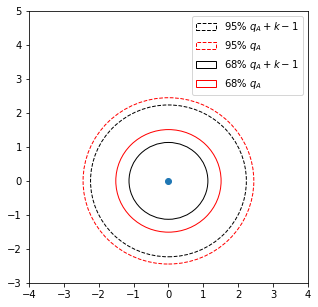

In [51]:
fig, ax = plt.subplots(figsize=(5,5)) # note we must use plt.subplots, not plt.subplot
ax.set_xlim(-4,4)
ax.set_ylim(-3,5)
ax.scatter([0],[0])
median_contour = plt.Circle((0,0),mux_median, ls='dashed',color='black',fill=False, label='median')
q_A_contour = plt.Circle((0,0),mux_q_A, ls='dashed',color='red',fill=False, label='q_A')
median_contour_68 = plt.Circle((0,0),mux_median_68, ls='solid',color='black',fill=False, label='median')
q_A_contour_68 = plt.Circle((0,0),mux_q_A_68, ls='solid',color='red',fill=False, label='q_A')

ax.add_artist(median_contour)
ax.add_artist(q_A_contour)
ax.add_artist(median_contour_68)
ax.add_artist(q_A_contour_68)

ax.legend([median_contour,q_A_contour,median_contour_68,q_A_contour_68],['95% $q_A+k-1$','95% $q_A$','68% $q_A+k-1$','68% $q_A$'])

An extreme example with CL=45%. The representative $q_A$ contour has the same size, but the expected contour based on the median $q_A+k-1$ is very small.

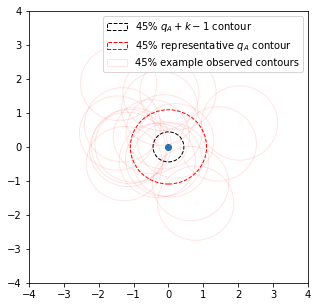

In [52]:
# An extreme example with CL=45%. The representative q_A contour has the same size, but the expected contour based on the median q_A+k-1 is very small.
CL=.45
fig, ax = plt.subplots(figsize=(5,5)) # note we must use plt.subplots, not plt.subplot
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.scatter([0],[0], alpha=1)
N_circles=20
mux_q_A = np.sqrt(chi2.ppf(CL,k))
mux_median = np.sqrt(chi2.ppf(CL,k)-k+1)
mux_q=mux_q_A
ax.scatter(x[:N_circles],y[:N_circles], alpha=0.01)
q_A_contour = plt.Circle((0,0),mux_q_A, ls='dashed',color='red',fill=False, label='q_A')
median_contour = plt.Circle((0,0),mux_median, ls='dashed',color='black',fill=False, label='median')
ax.add_artist(q_A_contour)
ax.add_artist(median_contour)
for i in range(N_circles):
    q_obs_contour = plt.Circle((x[i],y[i]),mux_q, color='red',fill=False, label='q_A', alpha=0.1)
    ax.add_artist(q_obs_contour)

ax.legend([median_contour, q_A_contour, q_obs_contour],
          ['{:.0%} $q_A+k-1$ contour'.format(CL),
          '{:.0%} representative $q_A$ contour'.format(CL),
          '{:.0%} example observed contours'.format(CL)])

## Follow up questions



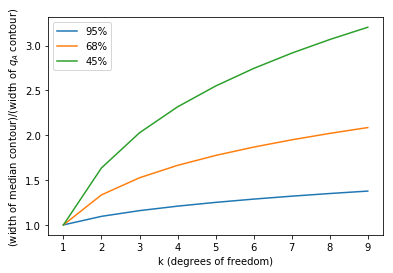

In [34]:
#Note the 
CL=0.95
kk = np.arange(1,10)
plt.plot(kk,np.sqrt(chi2.ppf(CL,kk))/np.sqrt(chi2.ppf(CL,kk)-kk+1),label='95%')
CL=0.68
plt.plot(kk,np.sqrt(chi2.ppf(CL,kk))/np.sqrt(chi2.ppf(CL,kk)-kk+1),label='68%')
CL=0.55
plt.plot(kk,np.sqrt(chi2.ppf(CL,kk))/np.sqrt(chi2.ppf(CL,kk)-kk+1),label='45%')
plt.xlabel('k (degrees of freedom)')
plt.ylabel('(width of median contour)/(width of $q_A$ contour)')
plt.legend()

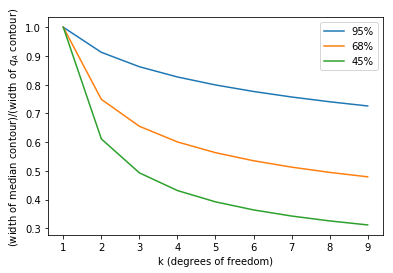

In [33]:
#Note the 
CL=0.95
kk = np.arange(1,10)
plt.plot(kk,np.sqrt(chi2.ppf(CL,kk)-kk+1)/np.sqrt(chi2.ppf(CL,kk)),label='95%')
CL=0.68
plt.plot(kk,np.sqrt(chi2.ppf(CL,kk)-kk+1)/np.sqrt(chi2.ppf(CL,kk)),label='68%')
CL=0.55
plt.plot(kk,np.sqrt(chi2.ppf(CL,kk)-kk+1)/np.sqrt(chi2.ppf(CL,kk)),label='45%')
plt.xlabel('k (degrees of freedom)')
plt.ylabel('(width of median contour)/(width of $q_A$ contour)')
plt.legend()

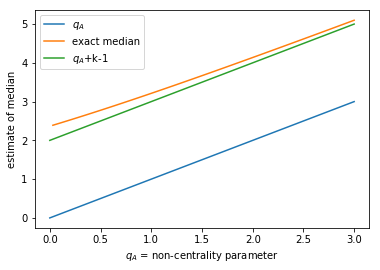

In [23]:
#How well does the q_A+k-1 approximation of the median work in >2 dimensions?
temp_q = np.linspace(0,3,100)
k=3
plt.plot(temp_q, temp_q, label='$q_A$')
plt.plot(temp_q, ncx2.median(df=k, nc=temp_q), label='exact median')
plt.plot(temp_q, temp_q+k-1, label='$q_A$+k-1')
plt.xlabel('$q_A$ = non-centrality parameter')
plt.ylabel('estimate of median')
plt.legend()
k=2 #put it back to 2 to avoid accidents